In [2]:
import pandas as pd
from matplotlib.ticker import ScalarFormatter
import numpy as np
import matplotlib.pyplot as plt

In [3]:
color_map = {
    "ARM-CMSIS-DSP": "blue",
    "CMSIS-DSP": "blue",
    "TillJIT": "orange",
    "JIT": "orange",
    "ReferenceCM": "green",
    "Peak": "red",
    "Intrinsics": "purple"
}

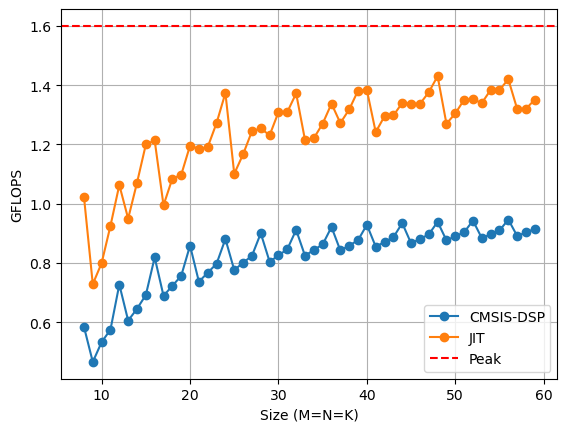

In [4]:
data = pd.read_csv('gemm_square_test1.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, marker='o')

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_80776/634558097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_80776/634558097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100


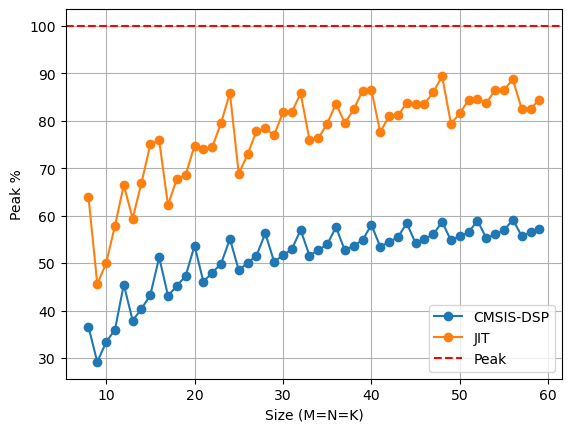

In [5]:
# Calculate percentage of peak performance
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
    plt.plot(subset['K'], subset['Peak'], label=type_exec, marker='o')

plt.axhline(y=100, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('Peak %')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Filter data for JIT and CMSIS-DSP
jit_data = data[data['Type'] == 'JIT']
cmsis_data = data[data['Type'] == 'CMSIS-DSP']

# Ensure both subsets are aligned by index
aligned_data = pd.merge(jit_data, cmsis_data, on=['M', 'K', 'N'], suffixes=('_jit', '_cmsis'))

# Calculate speedup
aligned_data['Speedup'] = aligned_data['GFLOPS_jit'] / aligned_data['GFLOPS_cmsis']

# Calculate average speedup
average_speedup = aligned_data['Speedup'].mean()
print(f"Average Speedup of JIT over CMSIS-DSP: {average_speedup}")

Average Speedup of JIT over CMSIS-DSP: 1.511849114815639


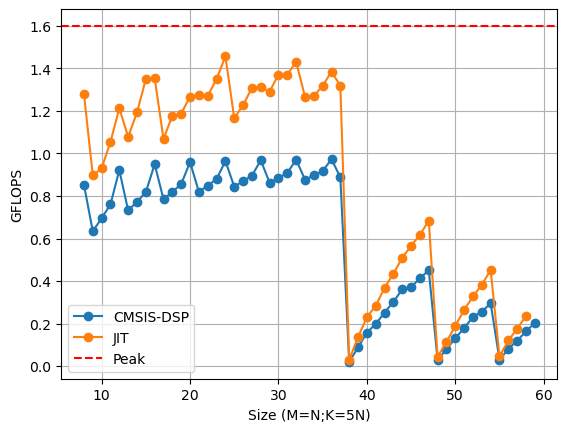

In [7]:
data = pd.read_csv('gemm_square_test2.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, marker='o')

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N;K=5N)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_80776/4103073457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_80776/4103073457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100


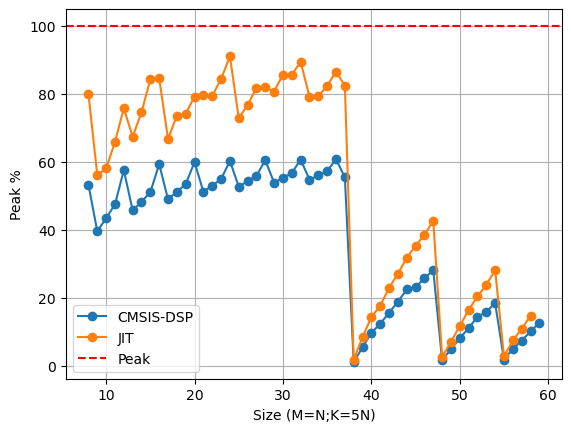

In [8]:
# Calculate percentage of peak performance
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
    plt.plot(subset['M'], subset['Peak'], label=type_exec, marker='o')

plt.axhline(y=100, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N;K=5N)')
plt.ylabel('Peak %')
plt.legend()
plt.grid(True)
plt.show()

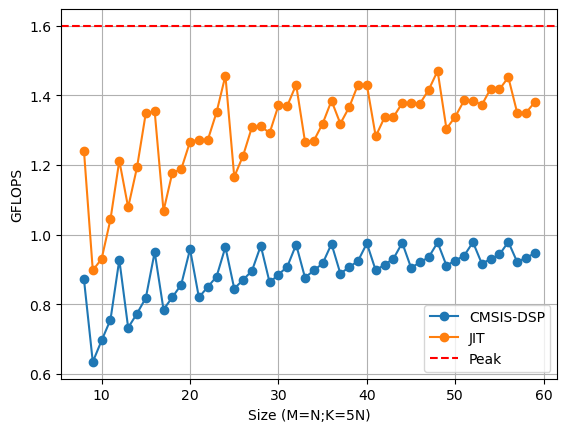

In [9]:
data = pd.read_csv('gemm_square_test3.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, marker='o')

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N;K=5N)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_80776/4103073457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_80776/4103073457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100


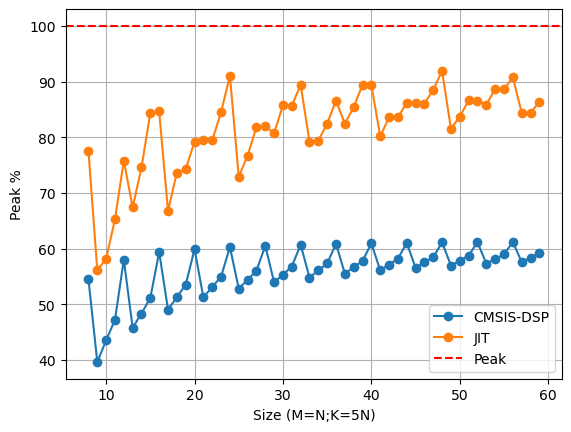

In [10]:
# Calculate percentage of peak performance
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
    plt.plot(subset['M'], subset['Peak'], label=type_exec, marker='o')

plt.axhline(y=100, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N;K=5N)')
plt.ylabel('Peak %')
plt.legend()
plt.grid(True)
plt.show()

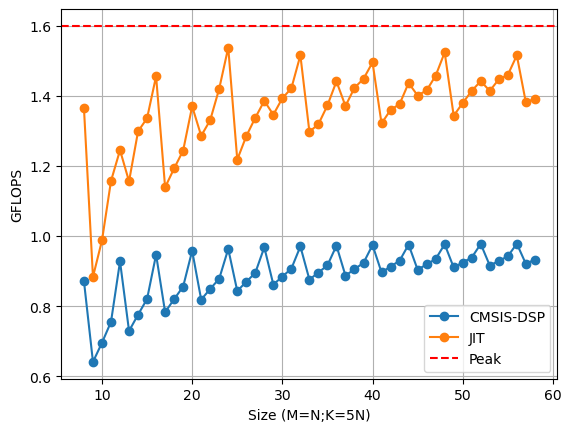

In [11]:
data = pd.read_csv('gemm_square_test4.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, marker='o')

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N;K=5N)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_80776/4103073457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
/var/folders/c0/3zmp_qkd1q96kl5cw3f5lyt80000gn/T/ipykernel_80776/4103073457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100


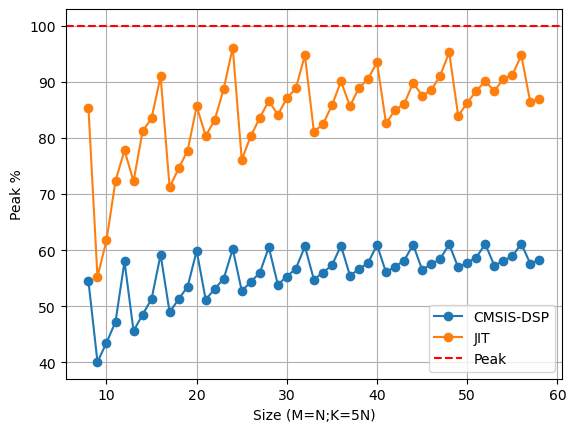

In [12]:
# Calculate percentage of peak performance
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    subset['Peak'] = (subset['GFLOPS'] / 1.6) * 100
    plt.plot(subset['M'], subset['Peak'], label=type_exec, marker='o')

plt.axhline(y=100, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N;K=5N)')
plt.ylabel('Peak %')
plt.legend()
plt.grid(True)
plt.show()

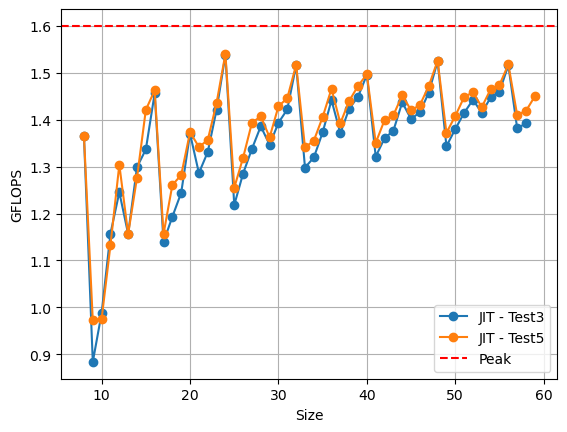

In [13]:
# Plot JIT values from two files for comparison

# Read both files
data1 = pd.read_csv('gemm_square_test4.csv', sep=";")
data2 = pd.read_csv('gemm_square_test5.csv', sep=";")

# Filter only JIT type
jit_data1 = data1[data1['Type'] == 'JIT']
jit_data2 = data2[data2['Type'] == 'JIT']

# Plot
plt.plot(jit_data1['M'], jit_data1['GFLOPS'], label='JIT - Test3', marker='o')
plt.plot(jit_data2['M'], jit_data2['GFLOPS'], label='JIT - Test5', marker='o')

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.show()

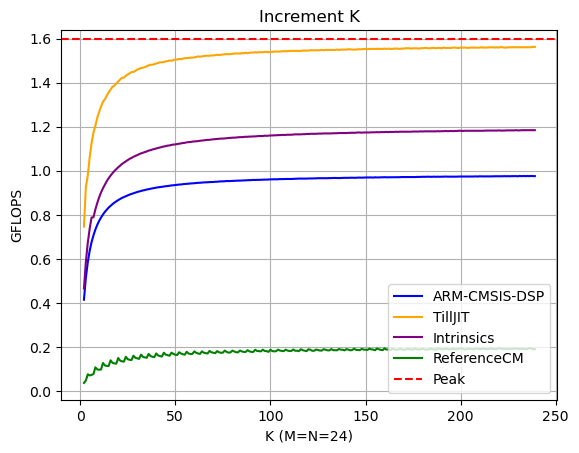

In [14]:
data = pd.read_csv('gemm_growing_k.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('K (M=N=24)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title("Increment K")
plt.show()

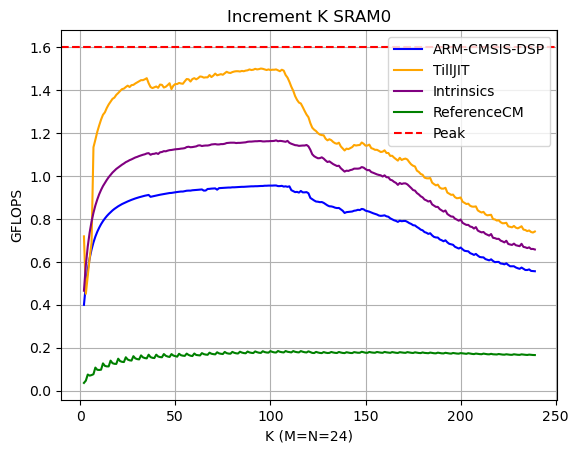

In [15]:
data = pd.read_csv('gemm_growing_k_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('K (M=N=24)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title("Increment K SRAM0")
plt.show()

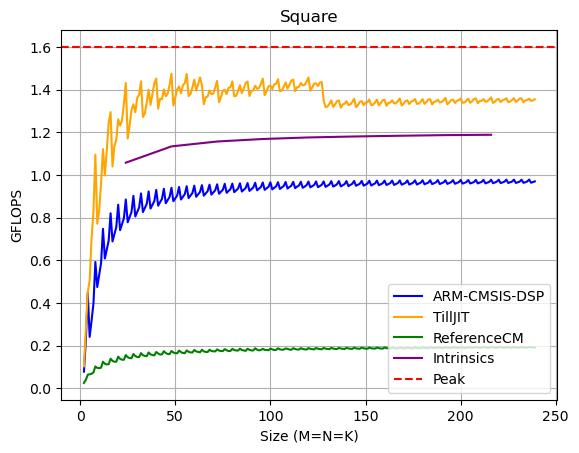

In [23]:
data = pd.read_csv('gemm_square_all.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Square")
plt.show()

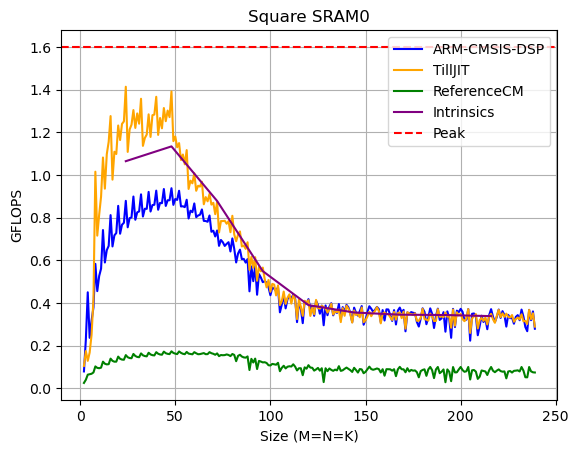

In [17]:
data = pd.read_csv('gemm_square_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Square SRAM0")
plt.show()

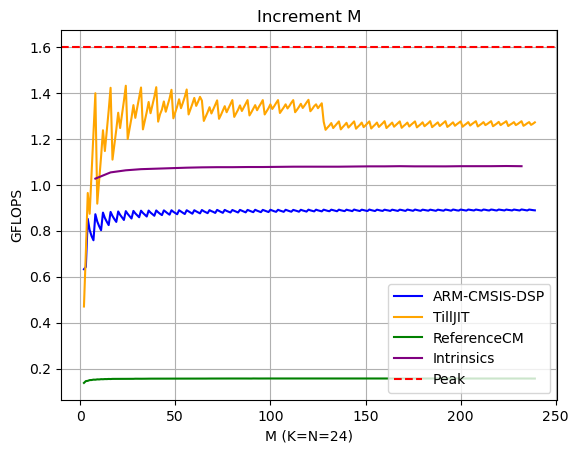

In [22]:
data = pd.read_csv('gemm_growing_m.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('M (K=N=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment M")
plt.show()

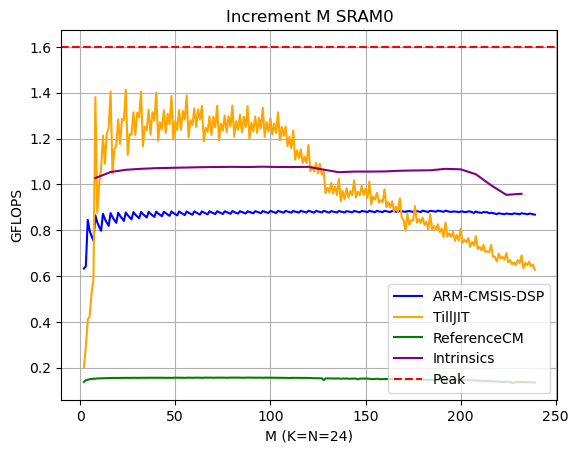

In [19]:
data = pd.read_csv('gemm_growing_m_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('M (K=N=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment M SRAM0")
plt.show()

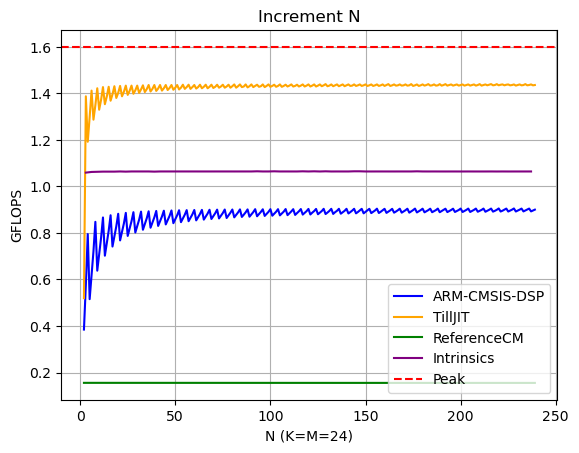

In [20]:
data = pd.read_csv('gemm_growing_n.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('N (K=M=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment N")
plt.show()

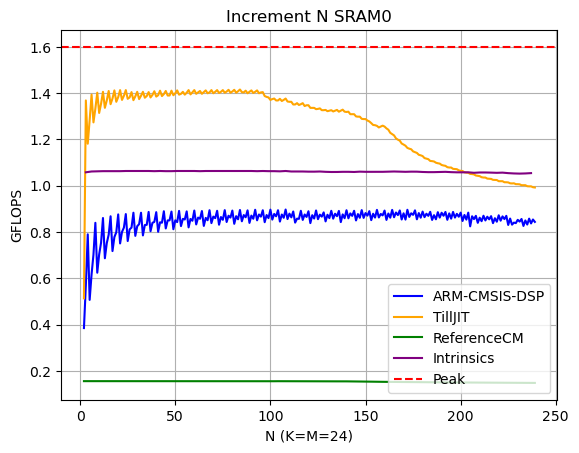

In [21]:
data = pd.read_csv('gemm_growing_n_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('N (K=M=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment N SRAM0")
plt.show()

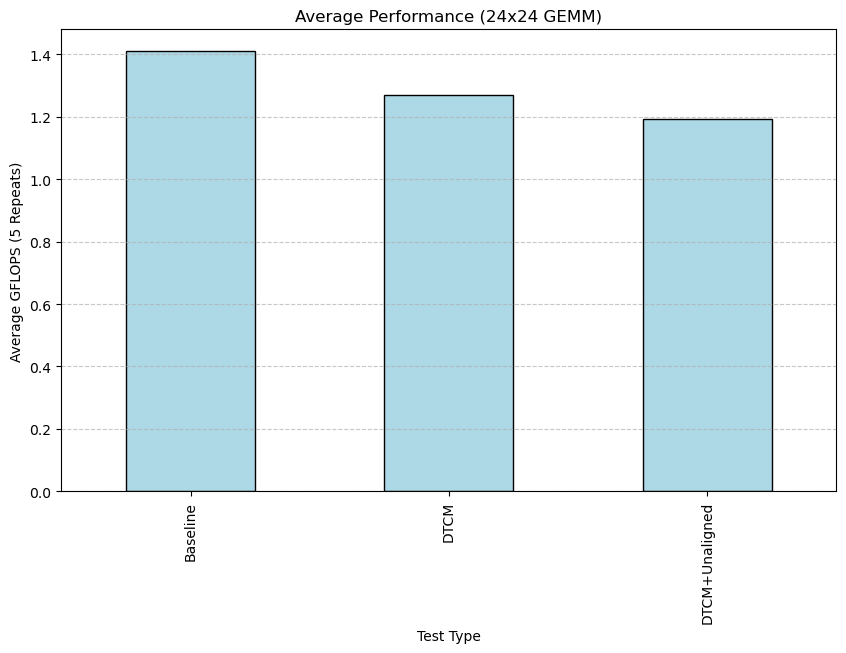

In [27]:
data = pd.read_csv('ablation.csv', sep=";")

# Calculate the average GFLOPS for each test type
average_gflops = data.groupby('Test')['GFLOPS'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
average_gflops.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel('Test Type')
plt.ylabel('Average GFLOPS (5 Repeats)')
plt.title('Average Performance (24x24 GEMM)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()